In [185]:
import os
# parent_dir = os.path.dirname(os.getcwd())
parent_dir = r'c:\Users\shrey\Desktop\DSC 214\DSC-241-Soccer-TDA'
os.chdir(parent_dir)
print("Working Directory:", os.getcwd())

Working Directory: c:\Users\shrey\Desktop\DSC 214\DSC-241-Soccer-TDA


In [186]:
import numpy as np
import networkx as nx
import pandas as pd
from pandas import json_normalize
from utils import read_json
pd.set_option('display.max_columns', None)

In [187]:
lineups_path = "data/eventing/lineups/{0}.json"
events_path = "data/eventing/events/{0}.json"

team_name = "Barcelona"
# team_name = "Deportivo Alavés"
match_id = 15946

### Step 1: Read data

In [188]:
lineups = read_json(lineups_path.format(match_id))
names_dict = {player["player_name"]: player["player_nickname"]
              for team in lineups for player in team["lineup"]}

names_dict

{'Malcom Filipe Silva de Oliveira': 'Malcom',
 'Philippe Coutinho Correia': 'Philippe Coutinho',
 'Sergio Busquets i Burgos': 'Sergio Busquets',
 'Jordi Alba Ramos': 'Jordi Alba',
 'Gerard Piqué Bernabéu': 'Gerard Piqué',
 'Luis Alberto Suárez Díaz': 'Luis Suárez',
 'Ivan Rakitić': None,
 'Ousmane Dembélé': None,
 'Samuel Yves Umtiti': 'Samuel Umtiti',
 'Lionel Andrés Messi Cuccittini': 'Lionel Messi',
 'Nélson Cabral Semedo': 'Nélson Semedo',
 'Sergi Roberto Carnicer': 'Sergi Roberto',
 'Clément Lenglet': None,
 'Rafael Alcântara do Nascimento': 'Rafinha',
 'Arturo Erasmo Vidal Pardo': 'Arturo Vidal',
 'Jasper Cillessen': None,
 'Arthur Henrique Ramos de Oliveira Melo': 'Arthur',
 'Marc-André ter Stegen': 'Marc-André ter Stegen',
 'Borja González Tomás': 'Borja Bastón',
 'Jonathan Rodríguez Menéndez': 'Jony',
 'Rubén Duarte Sánchez': 'Rubén Duarte',
 'Rubén Sobrino Pozuelo': 'Rubén Sobrino',
 'Víctor Laguardia Cisneros': 'Víctor Laguardia',
 'Ibai Gómez Pérez': 'Ibai Gómez',
 'Martín 

In [189]:
events = read_json(events_path.format(match_id))
df_events = json_normalize(events, sep="_").assign(match_id=match_id)

df_events.head()

,id,index,period,timestamp,minute,second,possession,duration,type_id,type_name,possession_team_id,possession_team_name,play_pattern_id,play_pattern_name,team_id,team_name,tactics_formation,tactics_lineup,related_events,location,player_id,player_name,position_id,position_name,pass_recipient_id,pass_recipient_name,pass_length,pass_angle,pass_height_id,pass_height_name,pass_end_location,pass_body_part_id,pass_body_part_name,pass_type_id,pass_type_name,carry_end_location,pass_switch,pass_outcome_id,pass_outcome_name,ball_receipt_outcome_id,ball_receipt_outcome_name,under_pressure,duel_type_id,duel_type_name,pass_aerial_won,counterpress,interception_outcome_id,interception_outcome_name,off_camera,ball_recovery_recovery_failure,pass_assisted_shot_id,pass_shot_assist,shot_statsbomb_xg,shot_end_location,shot_key_pass_id,shot_outcome_id,shot_outcome_name,shot_first_time,shot_technique_id,shot_technique_name,shot_body_part_id,shot_body_part_name,shot_type_id,shot_type_name,shot_freeze_frame,goalkeeper_end_location,goalkeeper_type_id,goalkeeper_type_name,goalkeeper_position_id,goalkeeper_position_name,pass_cross,goalkeeper_outcome_id,goalkeeper_outcome_name,clearance_left_foot,clearance_body_part_id,clearance_body_part_name,block_deflection,duel_outcome_id,duel_outcome_name,dribble_nutmeg,dribble_outcome_id,dribble_outcome_name,foul_committed_offensive,foul_committed_card_id,foul_committed_card_name,foul_won_defensive,pass_through_ball,pass_technique_id,pass_technique_name,out,clearance_right_foot,pass_inswinging,goalkeeper_technique_id,goalkeeper_technique_name,goalkeeper_body_part_id,goalkeeper_body_part_name,clearance_head,shot_aerial_won,miscontrol_aerial_won,dribble_overrun,pass_miscommunication,block_offensive,bad_behaviour_card_id,bad_behaviour_card_name,substitution_outcome_id,substitution_outcome_name,substitution_replacement_id,substitution_replacement_name,pass_cut_back,shot_one_on_one,foul_committed_advantage,foul_won_advantage,clearance_aerial_won,pass_deflected,pass_no_touch,foul_committed_type_id,foul_committed_type_name,pass_straight,pass_goal_assist,match_id
0,9f6e2ecf-6685-45df-a62e-c2db3090f6c1,1,1,00:00:00.000,0,0,1,0.000000,35,Starting XI,217,Barcelona,1,Regular Play,217,Barcelona,442.0,"[{'player': {'id': 20055, 'name': 'Marc-André ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15946
1,0300039d-150d-41e4-b29a-76602ef002e6,2,1,00:00:00.000,0,0,1,0.000000,35,Starting XI,217,Barcelona,1,Regular Play,206,Deportivo Alavés,451.0,"[{'player': {'id': 6629, 'name': 'Fernando Pac...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15946
2,491e8901-7630-4cc8-b57b-937dddff2eaa,3,1,00:00:00.000,0,0,1,0.000000,18,Half Start,217,Barcelona,1,Regular Play,217,Barcelona,NaN,NaN,[757b85ad-ddfe-44d5-b893-c23a9fb709d8],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15946
3,757b85ad-ddfe-44d5-b893-c23a9fb709d8,4,1,00:00:00.000,0,0,1,0.000000,18,Half Start,217,Barcelona,1,Regular Play,206

### Step 2: Compute max. minutes

In [190]:
first_red_card_minute = df_events[df_events.foul_committed_card_name.isin(["Second Yellow", "Red Card"])].minute.min()
first_substitution_minute = df_events[df_events.type_name == "Substitution"].minute.min()
max_minute = df_events.minute.max()

num_minutes = min(first_substitution_minute, first_red_card_minute, max_minute)
num_minutes

45

### Step 3: Set text information

In [191]:
plot_name = "statsbomb_match{0}_{1}".format(match_id, team_name)

opponent_team = [x for x in df_events.team_name.unique() if x != team_name][0]
plot_title ="{0}'s passing network against {1} (StatsBomb eventing data)".format(team_name, opponent_team)

plot_legend = "Location: pass origin\nSize: number of passes\nColor: number of passes"

### Step 4: Prepare data

In [192]:
def _statsbomb_to_point(location, max_width=120, max_height=80):
    '''
    Convert a point's coordinates from a StatsBomb's range to 0-1 range.
    '''
    return location[0] / max_width, 1-(location[1] / max_height)

In [193]:
df_passes = df_events[(df_events.type_name == "Pass") &
                      (df_events.pass_outcome_name.isna()) &
                      (df_events.team_name == team_name) &
                      (df_events.minute < num_minutes)].copy()

# If available, use player's nickname instead of full name to optimize space in plot
df_passes["pass_recipient_name"] = df_passes.pass_recipient_name.apply(lambda x: names_dict[x] if names_dict[x] else x)
df_passes["player_name"] = df_passes.player_name.apply(lambda x: names_dict[x] if names_dict[x] else x)

df_passes.head()

,id,index,period,timestamp,minute,second,possession,duration,type_id,type_name,possession_team_id,possession_team_name,play_pattern_id,play_pattern_name,team_id,team_name,tactics_formation,tactics_lineup,related_events,location,player_id,player_name,position_id,position_name,pass_recipient_id,pass_recipient_name,pass_length,pass_angle,pass_height_id,pass_height_name,pass_end_location,pass_body_part_id,pass_body_part_name,pass_type_id,pass_type_name,carry_end_location,pass_switch,pass_outcome_id,pass_outcome_name,ball_receipt_outcome_id,ball_receipt_outcome_name,under_pressure,duel_type_id,duel_type_name,pass_aerial_won,counterpress,interception_outcome_id,interception_outcome_name,off_camera,ball_recovery_recovery_failure,pass_assisted_shot_id,pass_shot_assist,shot_statsbomb_xg,shot_end_location,shot_key_pass_id,shot_outcome_id,shot_outcome_name,shot_first_time,shot_technique_id,shot_technique_name,shot_body_part_id,shot_body_part_name,shot_type_id,shot_type_name,shot_freeze_frame,goalkeeper_end_location,goalkeeper_type_id,goalkeeper_type_name,goalkeeper_position_id,goalkeeper_position_name,pass_cross,goalkeeper_outcome_id,goalkeeper_outcome_name,clearance_left_foot,clearance_body_part_id,clearance_body_part_name,block_deflection,duel_outcome_id,duel_outcome_name,dribble_nutmeg,dribble_outcome_id,dribble_outcome_name,foul_committed_offensive,foul_committed_card_id,foul_committed_card_name,foul_won_defensive,pass_through_ball,pass_technique_id,pass_technique_name,out,clearance_right_foot,pass_inswinging,goalkeeper_technique_id,goalkeeper_technique_name,goalkeeper_body_part_id,goalkeeper_body_part_name,clearance_head,shot_aerial_won,miscontrol_aerial_won,dribble_overrun,pass_miscommunication,block_offensive,bad_behaviour_card_id,bad_behaviour_card_name,substitution_outcome_id,substitution_outcome_name,substitution_replacement_id,substitution_replacement_name,pass_cut_back,shot_one_on_one,foul_committed_advantage,foul_won_advantage,clearance_aerial_won,pass_deflected,pass_no_touch,foul_committed_type_id,foul_committed_type_name,pass_straight,pass_goal_assist,match_id
10,be27cc25-92b5-4696-b43c-aad957a6119a,11,1,00:00:07.152,0,7,3,1.696529,30,Pass,217,Barcelona,1,Regular Play,217,Barcelona,NaN,NaN,"[4e4e4cad-9897-43ec-842d-585a4077f6ce, c8eeb78...","[33.6, 5.9]",5203.0,Sergio Busquets,9.0,Right Defensive Midfield,5470.0,Ivan Rakitić,12.490396,1.450414,3.0,High Pass,"[35.1, 18.3]",NaN,NaN,66.0,Recovery,NaN,NaN,NaN,NaN,NaN,NaN,True,NaN,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15946
12,b33c0b7f-7456-4efe-b43c-5fd7cbd14689,13,1,00:00:08.848,0,8,3,1.135950,30,Pass,217,Barcelona,1,Regular Play,217,Barcelona,NaN,NaN,[a0eee1dc-b5fc-40e6-ae5c-7d57d860fe4f],"[35.1, 18.3]",5470.0,Ivan Rakitić,11.0,Left Defensive Midfield,5477.0,Ousmane Dembélé,13.046455,-1.486382,3.0,High Pass,"[36.2, 5.3]",37.0,Head,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15946
15,c587e5ce-fe6e-4cfb-b510-8a8e193699d3,16,1,00:00:10.873,0,10,3,0.757764,30,Pass,217,Barcelona,1,Regular Play,217,Barcelona,NaN,NaN,[3ef3659a-b158-4bc1-96ac-08e55e19606d],"[34.3, 4.9]",5477.0,Ousmane Dembélé,16.0,Left Midfield,5211.0,Jordi Alba,9.585927,-2.790148,1.0,Ground Pass,"[25.3, 1.6]",40.0,Right Foot,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Na

In [194]:
df_passes["origin_pos_x"] = df_passes.location.apply(lambda x: _statsbomb_to_point(x)[0])
df_passes["origin_pos_y"] = df_passes.location.apply(lambda x: _statsbomb_to_point(x)[1])
player_position = df_passes.groupby("player_name").agg({"origin_pos_x": "median", "origin_pos_y": "median"})

player_position

,origin_pos_x,origin_pos_y
player_name,,
Gerard Piqué,0.490000,0.335000
Ivan Rakitić,0.585833,0.766250
Jordi Alba,0.662500,0.933750
Lionel Messi,0.667083,0.318750
Luis Suárez,0.755000,0.645000
Marc-André ter Stegen,0.105833,0.506250
Nélson Semedo,0.590833,0.115000
Ousmane Dembélé,0.726667,0.806250
Samuel Umtiti,0.467500,0.723125


In [195]:
player_pass_count = df_passes.groupby("player_name").size().to_frame("num_passes")
player_pass_value = df_passes.groupby("player_name").size().to_frame("pass_value")

player_pass_count

,num_passes
player_name,
Gerard Piqué,44
Ivan Rakitić,72
Jordi Alba,59
Lionel Messi,30
Luis Suárez,14
Marc-André ter Stegen,11
Nélson Semedo,31
Ousmane Dembélé,33
Samuel Umtiti,30


In [196]:
df_passes["pair_key"] = df_passes.apply(lambda x: "_".join(sorted([x["player_name"], x["pass_recipient_name"]])), axis=1)
pair_pass_count = df_passes.groupby("pair_key").size().to_frame("num_passes")
pair_pass_value = df_passes.groupby("pair_key").size().to_frame("pass_value")

pair_pass_count.head(10)

,num_passes
pair_key,
Gerard Piqué_Ivan Rakitić,18
Gerard Piqué_Jordi Alba,6
Gerard Piqué_Lionel Messi,4
Gerard Piqué_Luis Suárez,2
Gerard Piqué_Marc-André ter Stegen,7
Gerard Piqué_Nélson Semedo,13
Gerard Piqué_Ousmane Dembélé,1
Gerard Piqué_Samuel Umtiti,13
Gerard Piqué_Sergi Roberto,9


### Step 5: Plot passing network

c:\Users\shrey\Desktop\DSC 214\DSC-241-Soccer-TDA\visualization\passing_network.py:81: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "w-" (-> color='w'). The keyword argument will take precedence.
  ax.plot([line_pt[0][0], line_pt[1][0]], [line_pt[0][1], line_pt[1][1]], 'w-',
c:\Users\shrey\Desktop\DSC 214\DSC-241-Soccer-TDA\visualization\passing_network.py:112: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "w-" (-> color='w'). The keyword argument will take precedence.
  ax.plot([line_pt[0][0], line_pt[1][0]], [line_pt[0][1], line_pt[1][1]], 'w-',
c:\Users\shrey\Desktop\DSC 214\DSC-241-Soccer-TDA\visualization\passing_network.py:186: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "w-" (-> linestyle='-'). The keyword argument will take precedence.
  ax.plot([player1_x, player2_x], [player1_y, player2_y],
c:\Users\shrey\Desktop\DSC 214\DSC-2

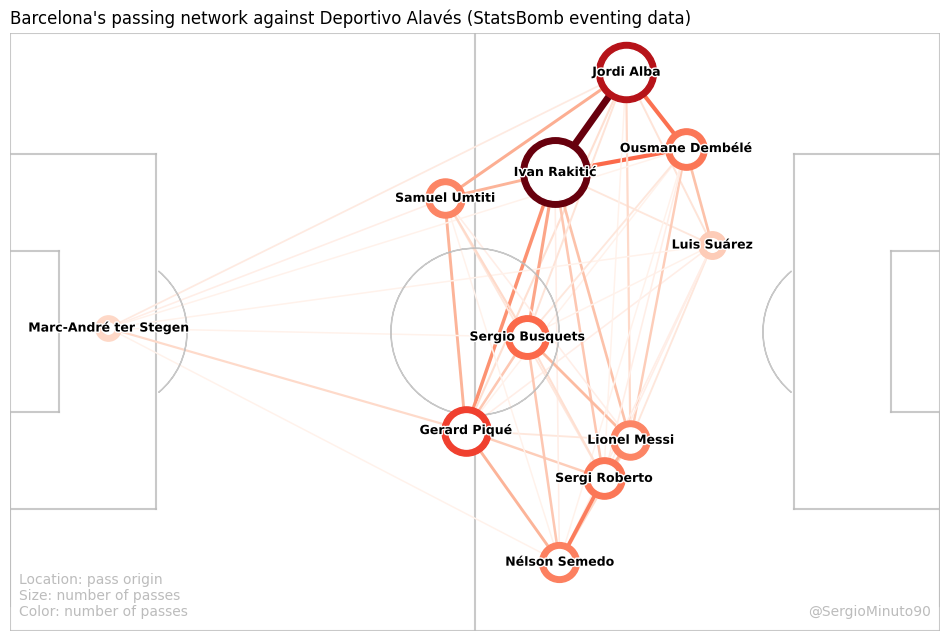

In [197]:
from visualization.passing_network import draw_pitch, draw_pass_map
import matplotlib.pyplot as plt


ax = draw_pitch()
ax = draw_pass_map(ax, player_position, player_pass_count, player_pass_value,
              pair_pass_count, pair_pass_value, plot_title, plot_legend)

plt.savefig("demo/{0}.png".format(plot_name))

- pass_end_location -> avg distance from opp goal
- pass_type_name -> no of each
- pass_through_ball -> %
- pass completion rate
- avg no of passes
- no of passes received by most advanced player
- avg position distance (exclude goalkeeper)
- Average Number of Unique Passing Links per Player
- Betti Number 0
------------------------------------------------------
- avg pass distance
- back line -> avg distance of back 4 from own goal
- low block -> avg distance of front 3 from own goal
- avg time between passes
- passes per possession
- Pass Distribution by Type
- Pass Distribution by pattern_name
- Directness of Play: Use pass_end_location and location 
- Betti Number 1

In [198]:
df_new = df_events[(df_events.type_name == "Pass") &
                    (df_events.team_name == team_name) &
                    (df_events.pass_outcome_name != 'Injury Clearance')].copy()
df_new.reset_index(drop=True, inplace=True)

def get_name_or_default(name):
    if not name or pd.isna(name):  # Checks if name is None or NaN
        return None
    return names_dict.get(name, name)  # Safely gets the value from the dictionary or returns the name itself

# If available, use player's nickname instead of full name to optimize space in plot
# df_new["pass_recipient_name"] = df_new.pass_recipient_name.apply(lambda x: None if not x else names_dict[x] if names_dict[x] else x)
df_new["pass_recipient_name"] = df_new["pass_recipient_name"].apply(get_name_or_default)
df_new["player_name"] = df_new.player_name.apply(lambda x: names_dict[x] if names_dict[x] else x)

df_new["origin_pos_x"] = df_new.location.apply(lambda x: _statsbomb_to_point(x)[0])
df_new["origin_pos_y"] = df_new.location.apply(lambda x: _statsbomb_to_point(x)[1])
df_new_no_gk = df_new[df_new["position_name"]!= 'Goalkeeper']
player_position = df_new.groupby("player_name").agg({"origin_pos_x": "median", "origin_pos_y": "median"})
player_position_no_gk = df_new_no_gk.groupby("player_name").agg({"origin_pos_x": "median", "origin_pos_y": "median"})

# df_new["pair_key"] = df_new.apply(lambda x: "_".join(sorted([x["player_name"], x["pass_recipient_name"]])), axis=1)
df_new["pair_key"] = df_new.apply(
    lambda x: "_".join(sorted([x["player_name"], x["pass_recipient_name"]]))
    if x["player_name"] is not None and x["pass_recipient_name"] is not None else None, axis=1)
pair_pass_count = df_new.groupby("pair_key").size().to_frame("num_passes")
pair_pass_value = df_new.groupby("pair_key").size().to_frame("pass_value")


In [199]:
df = df_new.copy()

In [200]:
df["origin_pos"] = df.location.apply(lambda x: np.array(_statsbomb_to_point(x)))
df["end_pos"] = df.pass_end_location.apply(lambda x: np.array(_statsbomb_to_point(x)))
def calculate_avg_pass_distance(df):
    # Calculate the Euclidean distance between origin and end positions for each pass
    df["pass_distance"] = df.apply(lambda row: np.linalg.norm(row["end_pos"] - row["origin_pos"]), axis=1)

    # Compute the average pass distance
    return df["pass_distance"].mean()

# Example usage with the adjusted coordinate transformation
average_pass_distance = calculate_avg_pass_distance(df)
print("Average Pass Distance:", average_pass_distance)

Average Pass Distance: 0.19760651651767108


In [201]:
def calculate_backline_distance(player_position):
    # Find the four players whose median x-coordinates are closest to zero
    four_closest_to_goal = player_position.nsmallest(4, 'origin_pos_x')
    # Calculate the average Euclidean distance of these four players from the point [0, 0.5] on the field
    goal_point = np.array([0, 0.5])
    four_closest_to_goal["distance_to_goal"] = four_closest_to_goal.apply(
        lambda row: np.linalg.norm(np.array([row['origin_pos_x'], row['origin_pos_y']]) - goal_point), axis=1)
    
    # Return the average of these distances
    return four_closest_to_goal["distance_to_goal"].mean()

# Calculate the average backline distance using the function
avg_backline_distance = calculate_backline_distance(player_position_no_gk)
print("Average Distance of the Back Four from Own Goal:", avg_backline_distance)


Average Distance of the Back Four from Own Goal: 0.5425938218758796


In [202]:
def calculate_front_three_distance(player_position):
    
    # Find the three players whose median x-coordinates are the largest (furthest forward)
    three_furthest_forward = player_position.nlargest(3, 'origin_pos_x')
    
    # Calculate the average distance of these three players from their own goal line (x = 0)
    average_distance_to_goal = three_furthest_forward['origin_pos_x'].mean()
    
    # Return the average distance to their own goal
    return average_distance_to_goal

# Calculate the average front three distance using the function
avg_front_three_distance = calculate_front_three_distance(player_position_no_gk)
print("Average Distance of the Front Three from Own Goal:", avg_front_three_distance)

Average Distance of the Front Three from Own Goal: 0.7384722222222222


In [203]:
df['timestamp'] = pd.to_datetime(df['timestamp'], errors='coerce')
def calculate_avg_time_between_passes(df):
    team_passes = df.copy()
    # Ensure the DataFrame is sorted by timestamp within each possession
    team_passes = team_passes.sort_values(by=['possession', 'timestamp'])
    # Convert timestamps to pandas datetime objects if they are not already
    team_passes['timestamp'] = pd.to_datetime(team_passes['timestamp'], errors='coerce') 
    # Check for any conversion failures
    if team_passes['timestamp'].isna().any():
        print("Warning: Some timestamps couldn't be converted and will be treated as NaN in calculations.")
    # Calculate the time difference between consecutive passes within the same possession
    team_passes['time_diff'] = team_passes.groupby('possession')['timestamp'].diff().dt.total_seconds()
    # Exclude the first pass in each possession as it does not have a preceding pass to calculate a time difference
    team_passes = team_passes.dropna(subset=['time_diff'])
    # Group by possession ID and calculate the mean time difference between passes for each possession
    mean_time_per_possession = team_passes.groupby('possession')['time_diff'].mean()
    # Calculate the global mean of these possession averages
    global_mean_time_between_passes = mean_time_per_possession.mean()
    
    return global_mean_time_between_passes

# Assuming df_new is your DataFrame, and "Barcelona" is the team you're analyzing
average_time_between_passes = calculate_avg_time_between_passes(df)
print(f"Average Time Between Passes for {team_name}:", average_time_between_passes)


Average Time Between Passes for Barcelona: 3.3448295130995573


C:\Users\shrey\AppData\Local\Temp\ipykernel_4860\1465170647.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['timestamp'] = pd.to_datetime(df['timestamp'], errors='coerce')


In [204]:
import pandas as pd

def calculate_global_avg_passes_per_possession(df, team_name):
    # Filter passes by team name
    team_passes = df.copy()
    
    # Group by possession ID and count the number of passes in each possession
    passes_per_possession = team_passes.groupby('possession').size()
    
    # Calculate the global average number of passes per possession
    global_avg_passes = passes_per_possession.mean()
    
    return global_avg_passes

# Assuming df_new is your DataFrame, and "Barcelona" is the team you're analyzing
average_passes_per_possession = calculate_global_avg_passes_per_possession(df, "Barcelona")
print(f"Average Number of Passes Per Possession for {team_name}:", average_passes_per_possession)

Average Number of Passes Per Possession for Barcelona: 10.409090909090908


In [205]:
def get_percentage_pass_types(df):
    # Count the number of each pass type and normalize to get the percentage
    pass_type_counts = df['pass_type_name'].value_counts(dropna=False)
    return pass_type_counts.to_dict()

# Assuming df_new is your DataFrame
pass_type_percentage = get_percentage_pass_types(df)
print("Percentage of Passes by Type:", pass_type_percentage)

Percentage of Passes by Type: {nan: 820, 'Recovery': 42, 'Throw-in': 25, 'Free Kick': 11, 'Corner': 7, 'Interception': 5, 'Goal Kick': 5, 'Kick Off': 1}


In [206]:
def get_percentage_pass_patterns(df):
    # Count the number of each pass pattern and normalize to get the percentage
    pass_pattern_counts = df['play_pattern_name'].value_counts(dropna=False)
    return pass_pattern_counts.to_dict()

# Assuming df_new is your DataFrame
pass_pattern_percentage = get_percentage_pass_patterns(df)
print("Percentage of Passes by Pattern:", pass_pattern_percentage)

Percentage of Passes by Pattern: {'Regular Play': 337, 'From Throw In': 315, 'From Free Kick': 136, 'From Keeper': 46, 'From Goal Kick': 36, 'From Corner': 25, 'From Kick Off': 21}


In [207]:
def calculate_directness_of_play(df):
    # Extract the x-coordinates from the normalized position arrays
    df2 = df.copy()
    df2['start_x'] = df2['origin_pos'].apply(lambda pos: pos[0])
    df2['end_x'] = df2['end_pos'].apply(lambda pos: pos[0])
    
    # Calculate the directness as the difference in x-coordinates
    df2['directness'] = df2['end_x'] - df2['start_x']
    
    # Calculate the average directness of all passes
    average_directness = df2['directness'].mean()
    
    return average_directness

# Assuming df2_new is your DataFrame
average_directness = calculate_directness_of_play(df)
print("Average Directness of Play:", average_directness)


Average Directness of Play: 0.027265283842794762


In [208]:
pair_pass_count['pair_key'] = pair_pass_count.index

Betti 0: 1
Betti 1: 59


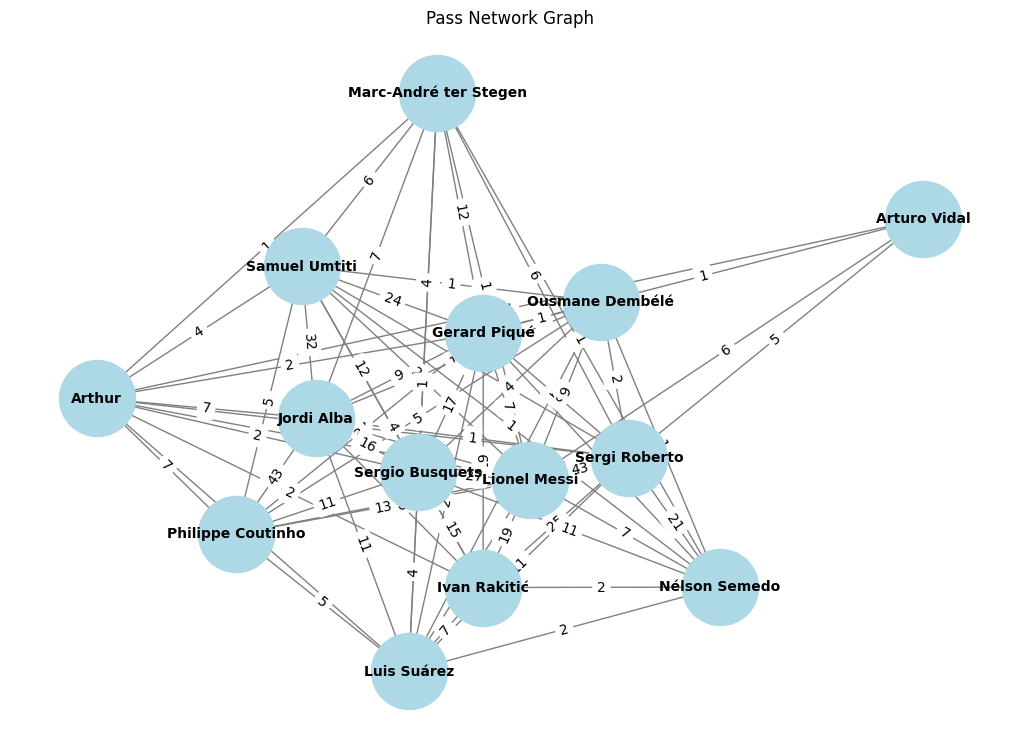

In [209]:
df = pd.DataFrame(pair_pass_count)
df.set_index('pair_key', inplace=True)

# Function to calculate Betti numbers
def calculate_betti_numbers(graph):
    # Compute the number of connected components (Betti 0)
    betti_0 = nx.number_connected_components(graph)
    
    # Compute the number of edges and nodes
    num_edges = graph.number_of_edges()
    num_nodes = graph.number_of_nodes()
    
    # Compute the rank of the cycle space (Betti 1)
    betti_1 = num_edges - num_nodes + betti_0
    
    return betti_0, betti_1

# Create a graph from the DataFrame
G = nx.Graph()

# Add edges to the graph
for pair_key, num_passes in df['num_passes'].items():
    player1, player2 = pair_key.split('_')
    G.add_edge(player1, player2, weight=num_passes)

# Calculate Betti numbers for the graph
betti_0, betti_1 = calculate_betti_numbers(G)
print(f"Betti 0: {betti_0}")
print(f"Betti 1: {betti_1}")

# Plot the graph for visualization
pos = nx.spring_layout(G)
plt.figure(figsize=(10, 7))
nx.draw(G, pos, with_labels=True, node_color='lightblue', edge_color='gray', node_size=3000, font_size=10, font_weight='bold')
labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)
plt.title("Pass Network Graph")
plt.show()
